In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 00 git setting

In [2]:
 cd "/content/drive/MyDrive/aiffelton_git/70sEnt/"

/content/drive/MyDrive/aiffelton_git/70sEnt


In [ ]:
cd "/content/drive/MyDrive/70sEnt/"

/content/drive/MyDrive/70sEnt


In [ ]:
# !git pull

In [ ]:
# !git stash

In [ ]:
# !git add EDA/
# !git commit -m "young May16th-timeseries EDA_fix1"

In [ ]:
# !git push

In [ ]:
# # git 로그인하기
# !git config --global user.email "wawa0070@naver.com"
# !git config --global user.name "katalria"

# 01 package import

In [3]:
pip install statsmodels==0.12

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 5.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
import pandas as pd
import numpy as np
import sys, os 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

import datetime
import matplotlib.pyplot as plt

In [5]:
sys.path.append(os.path.abspath('/content/drive/MyDrive/aiffelton_git/70sEnt/'))
from Preprocessing import data_preprocessing

# 02 Data load and preprocessing

In [6]:
socar_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/'
weather_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/기상데이터/'
finedust_file_apth='/content/drive/MyDrive/00_Aiffelton/데이터/미세먼지/'
standard_time='reservation_start_at'
location=None

In [ ]:
ts_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,location)
east_ts_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'동구')
north_ts_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'북구')
mid_ts_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'중구')
south_ts_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'남구')
ulju_ts_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'울주군')

# 03 쏘카 수요 시계열 검증


 - 쏘카 수요를 예측 하려면 정상성을 만족하는 시계열 데이터를 만족해야 가능
 - 시계열데이터의 정상성을 검증하는 방법에는 통계적 기법인 ADFuller를 사용하여 검증을 진행
 - 울산 지역 전체의 쏘카 시간당 이용 대수같은 경우에는 ADFuller 값이 낮게 나옴
 - 구군별 쏘카 시간당 이용 대수의 ADFuller 값은 굉장히 낮게 나온다
 - 따라서 쏘카 시간당 이용 대수는 정상성을 만족하는 시계열 데이터이다

In [8]:
adfuller(ts_df['count'], autolag="AIC")

(-8.550962636827187,
 9.226022805816038e-14,
 36,
 7955,
 {'1%': -3.4311723018698483,
  '10%': -2.5669634321950032,
  '5%': -2.861903398224588},
 44875.844873568174)

In [9]:
result =adfuller(ts_df['count'], autolag="AIC")

print("--- total Adfuller---")
print("ADF Statistic: %f " % result[0])
print("p-value: %1.10f " % result[1])
print("Lag: %d " % result[2])
print("observation: %d " % result[3])


--- total Adfuller---
ADF Statistic: -8.550963 
p-value: 0.0000000000 
Lag: 36 
observation: 7955 


In [ ]:
adfuller(north_ts_df['count'], autolag="AIC")

(-9.381629043054245,
 6.932237696669265e-16,
 36,
 7955,
 {'1%': -3.4311723018698483,
  '10%': -2.5669634321950032,
  '5%': -2.861903398224588},
 21976.74100843686)

In [51]:
result = adfuller(north_ts_df['count'], autolag="AIC")

print("--- regionC Adfuller---")
print("ADF Statistic: %f " % result[0])
print("p-value: %1.10f " % result[1])
print("Lag: %d " % result[2])
print("observation: %d " % result[3])

--- regionC Adfuller---
ADF Statistic: -9.381629 
p-value: 0.0000000000 
Lag: 36 
observation: 7955 


In [ ]:
adfuller(mid_ts_df['count'], autolag="AIC")

(-11.811823863644179,
 8.823721001789192e-22,
 33,
 7958,
 {'1%': -3.4311719917791184,
  '10%': -2.566963359258373,
  '5%': -2.8619032612057644},
 20740.120193833718)

In [52]:
result =adfuller(mid_ts_df['count'], autolag="AIC")

print("--- regionD Adfuller---")
print("ADF Statistic: %f " % result[0])
print("p-value: %1.10f " % result[1])
print("Lag: %d " % result[2])
print("observation: %d " % result[3])

--- regionD Adfuller---
ADF Statistic: -11.811824 
p-value: 0.0000000000 
Lag: 33 
observation: 7958 


In [ ]:
adfuller(east_ts_df['count'], autolag="AIC")

(-10.283184910902671,
 3.73313127336696e-18,
 36,
 7955,
 {'1%': -3.4311723018698483,
  '10%': -2.5669634321950032,
  '5%': -2.861903398224588},
 23724.170191171826)

In [53]:
result =adfuller(east_ts_df['count'], autolag="AIC")

print("--- regionB Adfuller---")
print("ADF Statistic: %f " % result[0])
print("p-value: %1.10f " % result[1])
print("Lag: %d " % result[2])
print("observation: %d " % result[3])

--- regionB Adfuller---
ADF Statistic: -10.283185 
p-value: 0.0000000000 
Lag: 36 
observation: 7955 


In [ ]:
adfuller(south_ts_df['count'], autolag="AIC")

(-9.120690777562771,
 3.2113511978974508e-15,
 28,
 7963,
 {'1%': -3.4311714754806224,
  '10%': -2.5669632378194773,
  '5%': -2.861903033070527},
 37214.7097643789)

In [54]:
result =adfuller(south_ts_df['count'], autolag="AIC")

print("--- regionA Adfuller---")
print("ADF Statistic: %f " % result[0])
print("p-value: %1.10f " % result[1])
print("Lag: %d " % result[2])
print("observation: %d " % result[3])

--- regionA Adfuller---
ADF Statistic: -9.120691 
p-value: 0.0000000000 
Lag: 28 
observation: 7963 


In [ ]:
adfuller(ulju_ts_df['count'], autolag="AIC")

(-11.066700826449686,
 4.6621951895451647e-20,
 36,
 7955,
 {'1%': -3.4311723018698483,
  '10%': -2.5669634321950032,
  '5%': -2.861903398224588},
 35867.284118888136)

In [ ]:
result =adfuller(ulju_ts_df['count'], autolag="AIC")

print("--- regionE Adfuller---")
print("ADF Statistic: %f " % result[0])
print("p-value: %1.10f " % result[1])
print("Lag: %d " % result[2])
print("observation: %d " % result[3])

--- ulju Adfuller---
ADF Statistic: -11.066701 
p-value: 0.0000000000 
Lag: 36 
observation: 7955 


# 04 쏘카 시계열 분해
 - 정상성을 만족하는 시계열 데이터는 전통적 시계열 통계적 관점에서 보면 Trend, seasonality, residual이 합쳐진 형태로 해석한다
 - 이러한 해석에서 시계열 데이터를 분해하는 방법이 timeseries decompose 이다.
  - (classical) timeseries decompose : 전통적인 시계열 분해 방법
  - Seasonal timesereis decompose : 계절특성 시계열 분해 방법
 - EDA 과정에서는 시각적으로 확인이 용이한 전통적 시계열 분해 방법을 적용하여 진행
 - ACF, PACF로 Time Lag확인을 해야하지만 우선 통념적으로 Time Lag가 있을 것 같은 24시간(하루단위)과 168시간(일주일단위)로 seasonality 추출

In [10]:
plt.rc("figure", figsize=(20, 15))

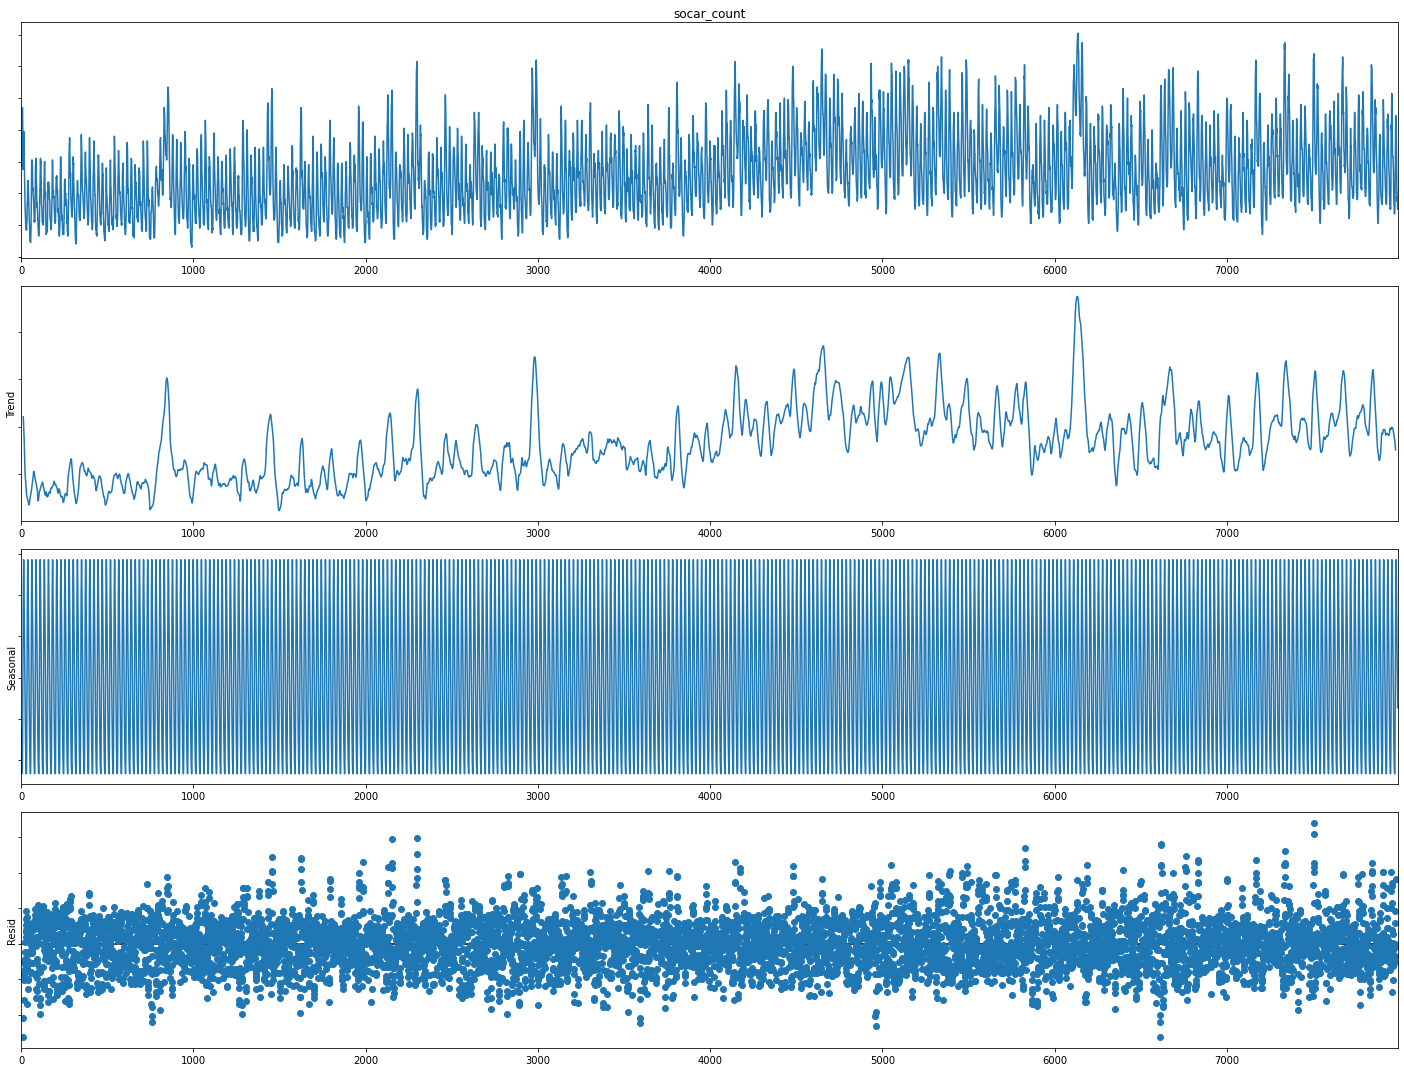

In [45]:
sd_24 = seasonal_decompose(ts_df['count'], period=24)
ax1 = sd_24.plot()
sd_168 = seasonal_decompose(ts_df['count'].to_numpy() - np.array(sd_24.seasonal), period=168)
for i in ax1.get_axes():
  i.tick_params(labelleft=False)


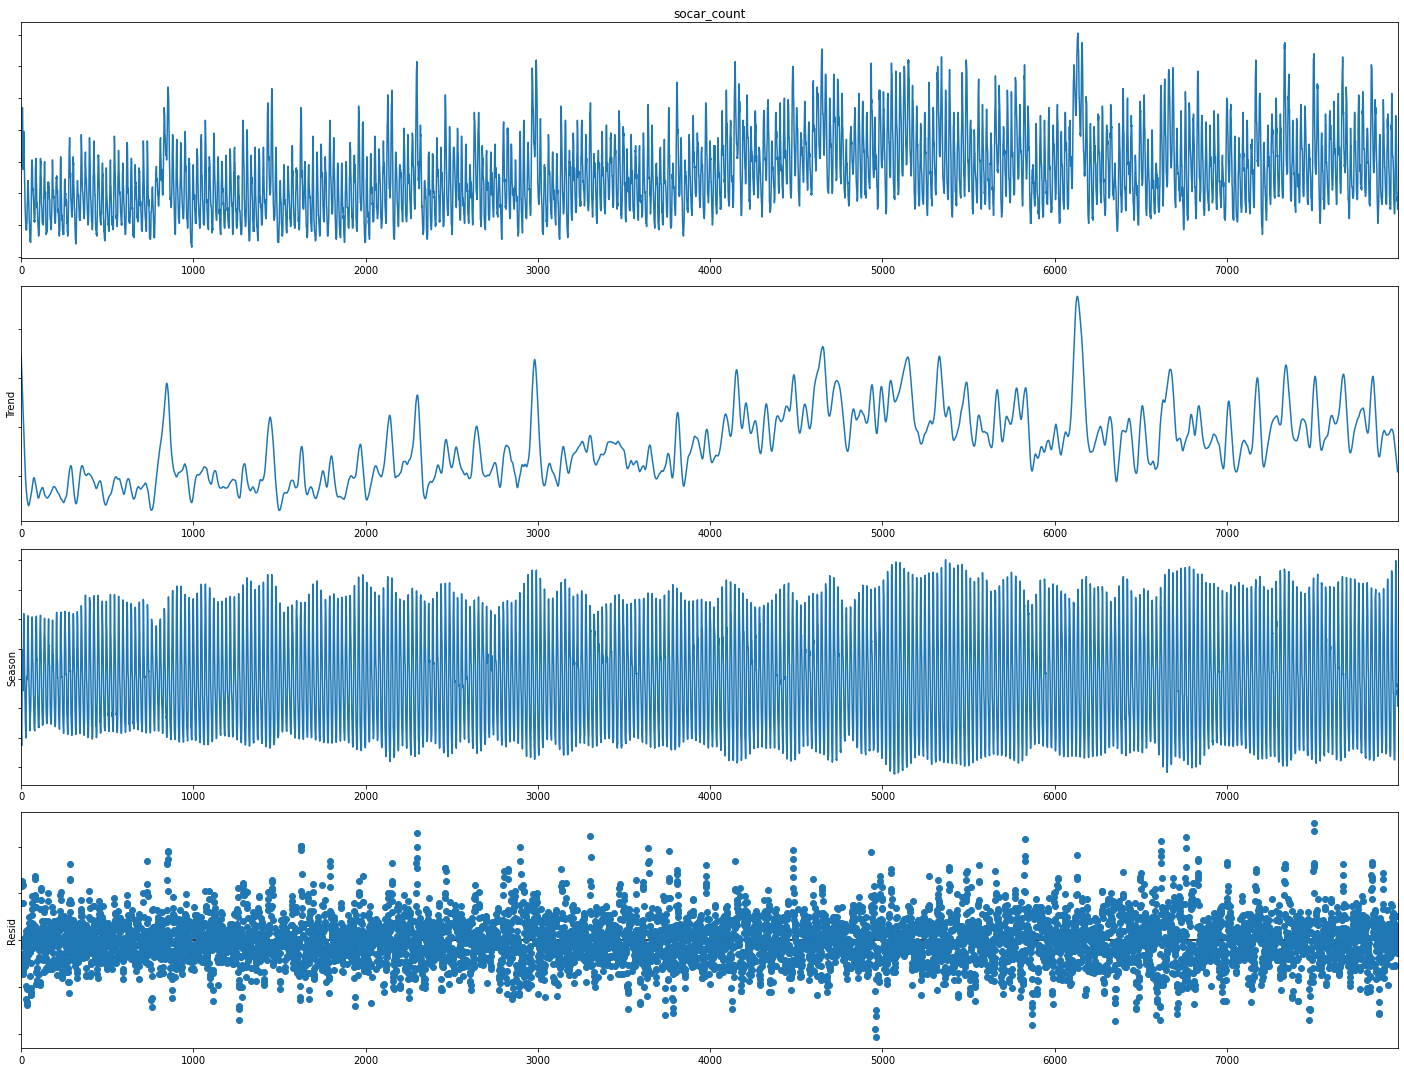

In [47]:
stl = STL(ts_df['count'], period=24)
res = stl.fit()
fig = res.plot()
for i in fig.get_axes():
  i.tick_params(labelleft=False)

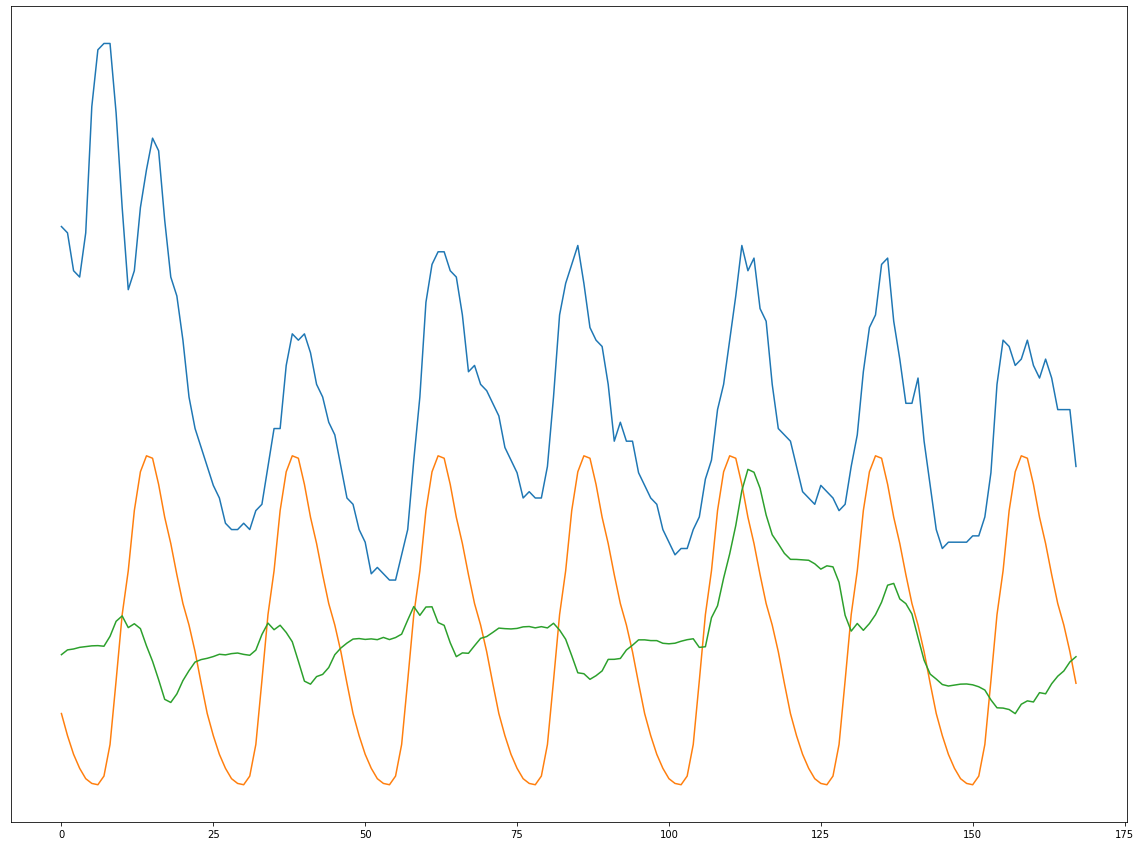

In [50]:
fig = plt.figure()
plt.plot(sd_24.observed[:168])
plt.plot(sd_24.seasonal[:168])
plt.plot(sd_168.seasonal[:168])
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

## Base 모델 구축
 - 고정 데이터와 시계열 데이터를 동시에 학습가능한 모델 필요
 - 시계열 데이터를 학습하는 시계열 모델과 고정 데이터를 학습하는 고정 모델를 따로 구성한 후, Concat을 통해 연결, 이후 Output단계를 2층의 Fully Connected Layer로 구성 하여 Y값 산출
 - 시계열 모델 : Bi Directional LSTM을 2층으로 구성 >> 양방향적인 시계열 특징을 추출
 - 고정 모델 : 고정 변수에 가중치를 적용하는 단순 Dense를 1층으로 그성
 - Concatenate : 연결된 각 모델에 가중치를 주지 않고 단순 연결을 하는 Concatenate사용



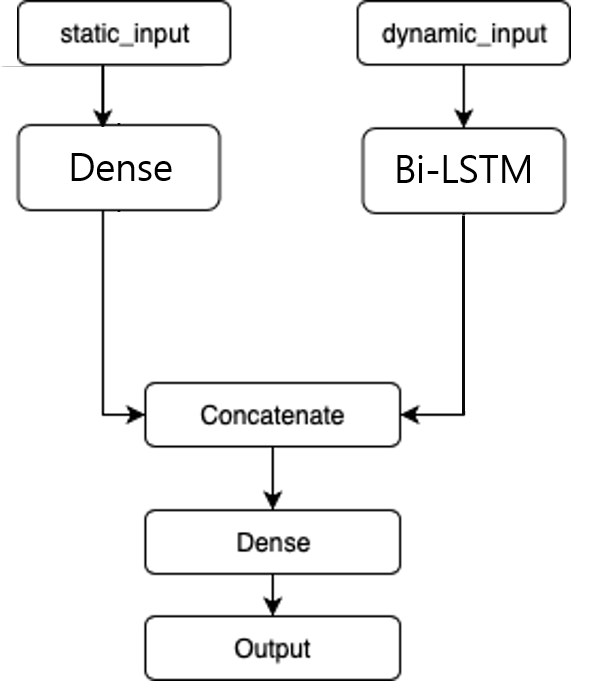

## Dataset 구축
 - 일반적으로 시계열 데이터를 나누는 방법

 - 제공된 데이터는 1월 부터 11월까지 데이터만 존재
 - 시계열 특성이 강한 데이터 특성상 일반적으로 시계열 데이터를 나누는 방법으로 dataset을 구축하면 후반부의 패턴을 충분히 표현하지 못함
 - Kaggle 자전거 데이터를 벤치마킹해서 4주 train, 2주 test, 4주 train, 2주 test .... 으로 dataset 구축
 - 연단위로 발생하는 계절적 특성을 학습하기 보다 짧은 한달 정도로 발생하는 짧은 특성을 학습하는 것이 예측 정확도를 더 올릴 수 있을 것이라 판단
 - 각 dataset을 같은 모델에 fitting한 결과 기존의 방법론보다 더 성능이 높게 나오는 것을 확인
